ETAPA 1 - CARRGAR PACOTES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors

ETAPA 2 - CARREGAR CONJUNTO DE DADOS

In [3]:
# Carregando um arquivo local como DataFrame do pandas
df = pd.read_csv(
    "C:/Users/ferna/OneDrive/Documentos/Disciplina - análise de dados/Projeto/projeto2.csv",
    encoding="latin1",
    sep=";"        # importante! seu arquivo usa ponto e vírgula
)

print(df.head())

   Year      Month  Dengue  Zika  Chikungunya  LeishVisc  LeishTeg  \
0  2017    Janeiro     966   240          667         21        28   
1  2017  Fevereiro    1026   201          463         13        28   
2  2017      Março    1186   228          478         19        21   
3  2017      Abril     930   140          309         14        16   
4  2017       Maio     692   138          346         18        30   

   Precipitation  Temp_mean  Temp_max  Temp_min  RH  Wind_mean  
0          306.6       24.0      24.6      23.4  78        1.5  
1           92.1       24.9      25.5      24.3  68        1.7  
2          151.8       23.4      24.0      22.9  73        1.6  
3          106.4       21.8      22.4      21.3  75        1.5  
4          117.4       20.4      21.0      20.0  76        1.3  


ETAPA 3 - BOXPLOT PARA VISUALIZAR OUTLIERS PARA CADA DOENÇA

In [ ]:
## Comments:
# Boxplot com dados brutos

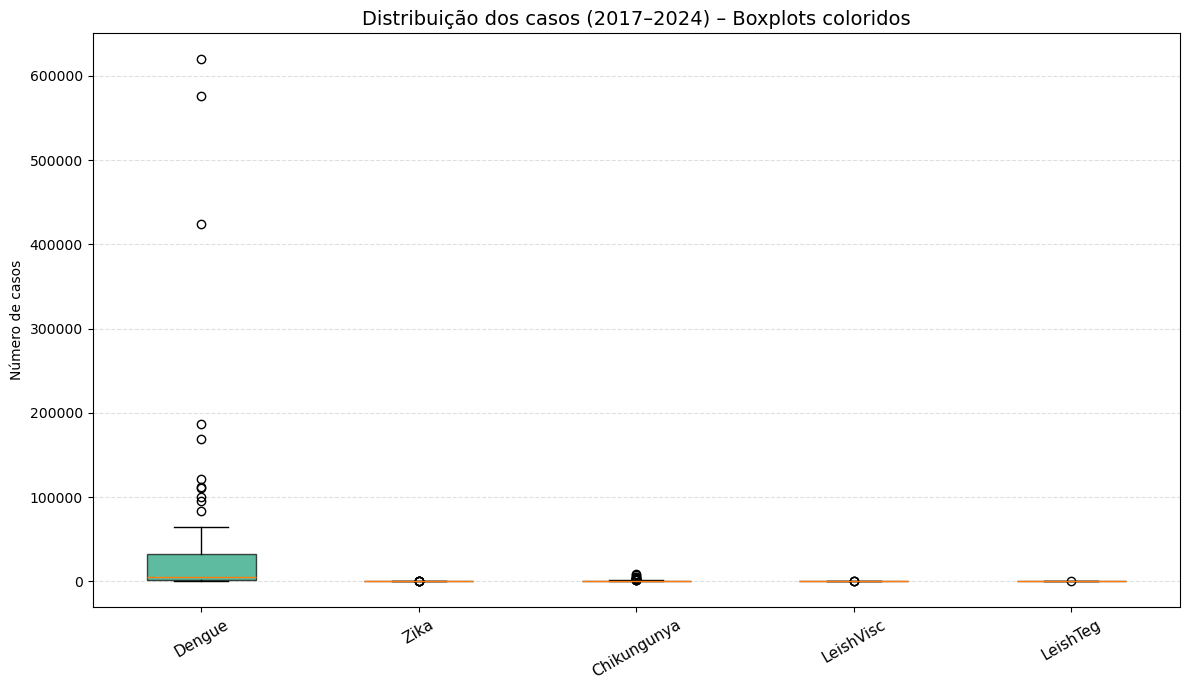

In [6]:
# Lista das doenças
disease_cols = ["Dengue", "Zika", "Chikungunya", "LeishVisc", "LeishTeg"]

# Cores: tons contrastantes de verde + amarelo e vermelho
colors = {
    "Dengue": "#1b9e77",        # verde escuro
    "Zika": "#66c2a5",          # verde claro
    "Chikungunya": "#008B45",   # verde forte
    "LeishVisc": "#FFD700",     # amarelo
    "LeishTeg": "#E41A1C",      # vermelho
}

plt.figure(figsize=(12, 7))

# Criar each boxplot manualmente
boxplots = plt.boxplot(
    [df[col] for col in disease_cols],
    labels=disease_cols,
    patch_artist=True  # permite colorir a caixa
)

# Aplicar as cores caixa por caixa
for patch, col in zip(boxplots['boxes'], disease_cols):
    patch.set_facecolor(colors[col])
    patch.set_alpha(0.7)

# Personalizações
plt.title("Distribuição dos casos (2017–2024) – Boxplots coloridos", fontsize=14)
plt.ylabel("Número de casos")
plt.xticks(rotation=30, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

## Comments:
# Boxplot em escala log10 para enxergar melhor extremos

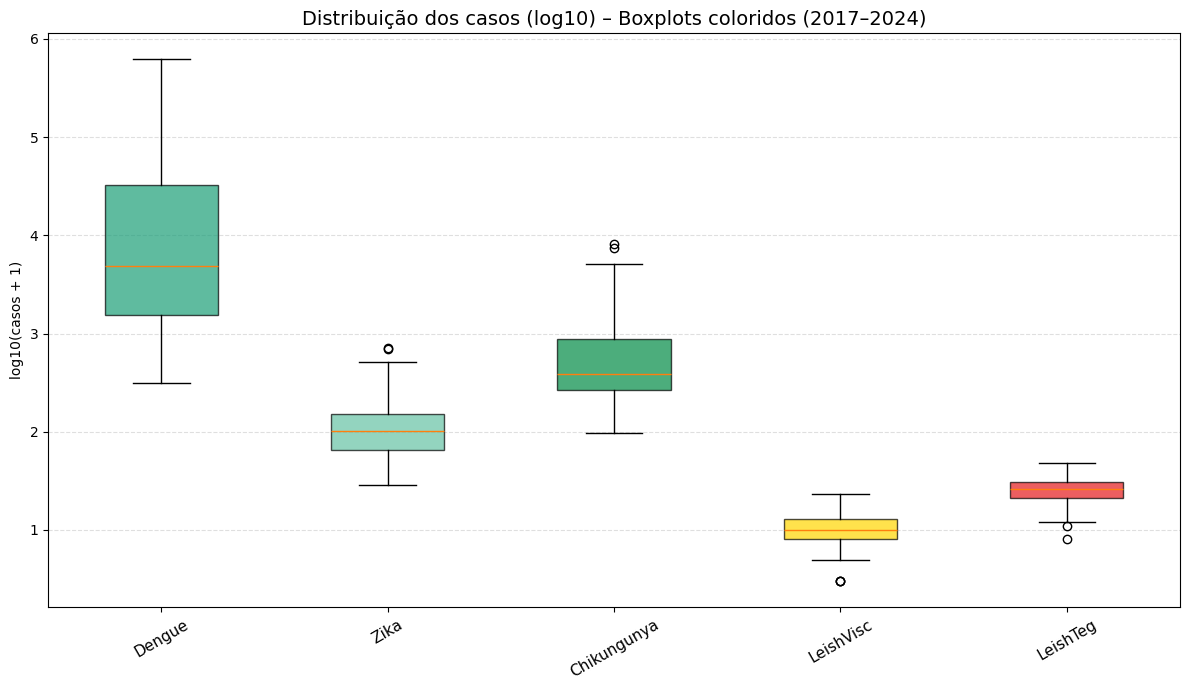

In [7]:
# Lista das doenças
disease_cols = ["Dengue", "Zika", "Chikungunya", "LeishVisc", "LeishTeg"]

# Cores: tons de verde para arboviroses + amarelo e vermelho para leishmanioses
colors = {
    "Dengue": "#1b9e77",        # verde escuro
    "Zika": "#66c2a5",          # verde claro
    "Chikungunya": "#008B45",   # verde forte
    "LeishVisc": "#FFD700",     # amarelo
    "LeishTeg": "#E41A1C",      # vermelho
}

# Transformação log10 (casos + 1 para evitar log(0))
df_log = np.log10(df[disease_cols] + 1)

plt.figure(figsize=(12, 7))

# Criar os boxplots com os dados em log
boxplots = plt.boxplot(
    [df_log[col] for col in disease_cols],
    labels=disease_cols,
    patch_artist=True  # permite colorir as caixas
)

# Aplicar as cores em cada caixa
for patch, col in zip(boxplots['boxes'], disease_cols):
    patch.set_facecolor(colors[col])
    patch.set_alpha(0.7)

# Personalizações
plt.title("Distribuição dos casos (log10) – Boxplots coloridos (2017–2024)", fontsize=14)
plt.ylabel("log10(casos + 1)")
plt.xticks(rotation=30, fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

ETAPA 4 - IDENTIFICAR E LISTAR OS OUTLIERS POR DOENÇA

In [8]:
disease_cols = ["Dengue", "Zika", "Chikungunya", "LeishVisc", "LeishTeg"]

outlier_masks = {}  # para guardar as máscaras de outlier por doença

for col in disease_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # máscara booleana de outliers nessa coluna
    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_masks[col] = mask

    outliers = df.loc[mask, ["Year", "Month", col]]

    print(f"\n================ {col} ================")
    print(f"Q1 = {q1:.2f}, Q3 = {q3:.2f}, IQR = {iqr:.2f}")
    print(f"Limites: [{lower_bound:.2f}, {upper_bound:.2f}]")
    if outliers.empty:
        print("Nenhum outlier encontrado.")
    else:
        print("Outliers encontrados:")
        print(outliers)


================ Dengue ================
Q1 = 1563.75, Q3 = 32496.75, IQR = 30933.00
Limites: [-44835.75, 78896.25]
Outliers encontrados:
    Year      Month  Dengue
27  2019      Abril  111775
28  2019       Maio  121973
63  2022      Abril  110561
64  2022       Maio  100059
74  2023      Março   83951
75  2023      Abril   95912
85  2024  Fevereiro  168723
86  2024      Março  424639
87  2024      Abril  619390
88  2024       Maio  575421
89  2024      Junho  187046

================ Zika ================
Q1 = 64.50, Q3 = 151.25, IQR = 86.75
Limites: [-65.62, 281.38]
Outliers encontrados:
    Year      Month  Zika
25  2019  Fevereiro   480
26  2019      Março   514
27  2019      Abril   714
28  2019       Maio   698
38  2020      Março   295
87  2024      Abril   290

================ Chikungunya ================
Q1 = 265.50, Q3 = 875.25, IQR = 609.75
Limites: [-649.12, 1789.88]
Outliers encontrados:
    Year      Month  Chikungunya
49  2021  Fevereiro         2188
50  2021      Ma

ETAPA 5 - SUBSTITUIR OS OUTLIERS POR NAN

In [9]:
# Lista das doenças
disease_cols = ["Dengue", "Zika", "Chikungunya", "LeishVisc", "LeishTeg"]

# Dicionário para armazenar máscaras de outlier
outlier_masks = {}

# Identificação dos outliers (critério do boxplot)
for col in disease_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Máscara booleana para outliers
    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_masks[col] = mask

# Criar cópia do df e substituir apenas valores outliers por NaN
df_filtrado = df.copy()

for col in disease_cols:
    df_filtrado.loc[outlier_masks[col], col] = float('nan')

# Visualização rápida para conferir
print(df_filtrado.head())

   Year      Month  Dengue   Zika  Chikungunya  LeishVisc  LeishTeg  \
0  2017    Janeiro   966.0  240.0        667.0        NaN      28.0   
1  2017  Fevereiro  1026.0  201.0        463.0       13.0      28.0   
2  2017      Março  1186.0  228.0        478.0       19.0      21.0   
3  2017      Abril   930.0  140.0        309.0       14.0      16.0   
4  2017       Maio   692.0  138.0        346.0       18.0      30.0   

   Precipitation  Temp_mean  Temp_max  Temp_min  RH  Wind_mean  
0          306.6       24.0      24.6      23.4  78        1.5  
1           92.1       24.9      25.5      24.3  68        1.7  
2          151.8       23.4      24.0      22.9  73        1.6  
3          106.4       21.8      22.4      21.3  75        1.5  
4          117.4       20.4      21.0      20.0  76        1.3  


## Comments:
# Verificar o número de missing values para cada doença

In [11]:
# Lista das doenças
disease_cols = ["Dengue", "Zika", "Chikungunya", "LeishVisc", "LeishTeg"]

# Contar quantos NaNs existem em cada coluna
missing_counts = df_filtrado[disease_cols].isna().sum()

print("Quantidade de valores NaN por doença:")
print(missing_counts)

Quantidade de valores NaN por doença:
Dengue         11
Zika            6
Chikungunya    13
LeishVisc       3
LeishTeg        1
dtype: int64


In [12]:
missing_percent = df_filtrado[disease_cols].isna().mean() * 100

print("\nPorcentagem de valores NaN por doença:")
print(missing_percent.round(2))


Porcentagem de valores NaN por doença:
Dengue         11.46
Zika            6.25
Chikungunya    13.54
LeishVisc       3.12
LeishTeg        1.04
dtype: float64


ETAPA 6 - IMPUTAÇÃO PELA MEDIANA PARA CADA DOENÇA

In [13]:
# Criar uma nova cópia para imputação
df_imputado = df_filtrado.copy()

# Imputação da mediana por coluna
for col in disease_cols:
    mediana = df_imputado[col].median()
    df_imputado[col].fillna(mediana, inplace=True)

print("Quantidade de NaNs após imputação:")
print(df_imputado[disease_cols].isna().sum())

# Visualizar primeiras linhas
print(df_imputado.head())


Quantidade de NaNs após imputação:
Dengue         0
Zika           0
Chikungunya    0
LeishVisc      0
LeishTeg       0
dtype: int64
   Year      Month  Dengue   Zika  Chikungunya  LeishVisc  LeishTeg  \
0  2017    Janeiro   966.0  240.0        667.0        9.0      28.0   
1  2017  Fevereiro  1026.0  201.0        463.0       13.0      28.0   
2  2017      Março  1186.0  228.0        478.0       19.0      21.0   
3  2017      Abril   930.0  140.0        309.0       14.0      16.0   
4  2017       Maio   692.0  138.0        346.0       18.0      30.0   

   Precipitation  Temp_mean  Temp_max  Temp_min  RH  Wind_mean  
0          306.6       24.0      24.6      23.4  78        1.5  
1           92.1       24.9      25.5      24.3  68        1.7  
2          151.8       23.4      24.0      22.9  73        1.6  
3          106.4       21.8      22.4      21.3  75        1.5  
4          117.4       20.4      21.0      20.0  76        1.3  


C:\Users\ferna\AppData\Local\Temp\ipykernel_22216\3617205700.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputado[col].fillna(mediana, inplace=True)


## Comments:
# Verificar o número de missing values para cada doença após a aplicação da imputação pela mediana

In [14]:
# Lista das doenças
disease_cols = ["Dengue", "Zika", "Chikungunya", "LeishVisc", "LeishTeg"]

missing_after = df_imputado[disease_cols].isna().sum()

print("Missing values após a imputação:")
print(missing_after)

Missing values após a imputação:
Dengue         0
Zika           0
Chikungunya    0
LeishVisc      0
LeishTeg       0
dtype: int64


ETAPA 7 - CALCULAR VIF (Variance Inflation Factor)

## Comments:
# Essa etapa é muito importante quando você pretende usar modelos que dependem de relações lineares entre variáveis (como regressão, PCA, alguns tipos de clustering e até métricas de distância).
# Quando duas (ou mais) dessas variáveis estão fortemente correlacionadas entre si, dizemos que existe Colinearidade (ou multicolinearidade).
# Quando isso acontece, uma delas pode ser “redundante”.
# O VIF mede o quanto uma variável é explicada pelas outras variáveis preditoras.
# Interpretando:
VIF	Interpretação
VIF = 1	sem colinearidade
VIF entre 1 e 5 = colinearidade moderada (ok)
VIF entre 5 e 10 = colinearidade alta (requer atenção)
VIF > 10 = colinearidade muito forte → excluir variável


In [15]:
# Código para calcular o VIF das variáveis ambientais
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Selecione apenas as variáveis preditoras (ambientais)
predictors = ["Precipitation", "Temp_mean", "Temp_max", "Temp_min", "RH", "Wind_mean"]

X = df_imputado[predictors].copy()

# Opcional (mas recomendado): padronizar antes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular o VIF
vif_df = pd.DataFrame()
vif_df["Variable"] = predictors
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_df)

        Variable          VIF
0  Precipitation     3.955476
1      Temp_mean    78.373580
2       Temp_max  1281.537158
3       Temp_min  1176.965153
4             RH     5.491973
5      Wind_mean     1.391804


ETAPA 8 - REMOVERr Temp_max e Temp_min DO MEU DATAFRAME

In [16]:
df_reduzido = df_imputado.drop(columns=["Temp_max", "Temp_min"])

In [18]:
print(df_reduzido.columns)

Index(['Year', 'Month', 'Dengue', 'Zika', 'Chikungunya', 'LeishVisc',
       'LeishTeg', 'Precipitation', 'Temp_mean', 'RH', 'Wind_mean'],
      dtype='object')


ETAPA 9 - ORGANIZAÇÃO DO DATASET

In [19]:
# Criar listas de colunas
doencas = ["Dengue", "Zika", "Chikungunya", "LeishVisc", "LeishTeg"]  # ajuste aos seus nomes
variaveis = ["Temp_mean", "Precipitation", "RH", "Wind_mean"]

In [20]:
# Construir a matriz doença × variável (correlações)
corr_matrix = pd.DataFrame(index=doencas, columns=variaveis, dtype=float)

for d in doencas:
    for v in variaveis:
        corr_matrix.loc[d, v] = df_reduzido[d].corr(df_reduzido[v])

print("Matriz de correlação doença × variável:")
print(corr_matrix)

Matriz de correlação doença × variável:
             Temp_mean  Precipitation        RH  Wind_mean
Dengue        0.075310       0.176689  0.198455  -0.302207
Zika          0.199990       0.196795  0.349131  -0.285747
Chikungunya   0.157301       0.177824  0.102748  -0.128093
LeishVisc    -0.054317       0.066589  0.117683   0.024663
LeishTeg      0.183764       0.179794  0.069006   0.172212


In [21]:
# Definir X para PCA (matriz numérica)
# Como no meu caso eu irei rodar análises não supervisionadas, eu não tenho uma variável dependente y 
X = corr_matrix.values
print("\nX (valores numéricos para PCA):")
print(X)


X (valores numéricos para PCA):
[[ 0.07531045  0.17668896  0.1984551  -0.30220724]
 [ 0.19999036  0.19679509  0.34913052 -0.2857465 ]
 [ 0.15730113  0.17782399  0.10274846 -0.12809301]
 [-0.0543166   0.06658946  0.11768265  0.02466301]
 [ 0.18376407  0.17979419  0.06900613  0.17221243]]


In [22]:
# Verificar a estrutura dos dados
print("\nDoenças analisadas:", doencas)
print("Variáveis ambientais:", variaveis)
print("Formato de X:", X.shape)


Doenças analisadas: ['Dengue', 'Zika', 'Chikungunya', 'LeishVisc', 'LeishTeg']
Variáveis ambientais: ['Temp_mean', 'Precipitation', 'RH', 'Wind_mean']
Formato de X: (5, 4)


## Comments:
# Esses comandos visam armazenar as informações descritivas (metadados)

In [23]:
# Armazenar nomes das 'variáveis' e 'amostras' para PCA
feature_names = variaveis   # eixos (variáveis ambientais)
target_names = doencas      # "amostras" da PCA (cada doença = 1 linha em X)

In [24]:
target_names

['Dengue', 'Zika', 'Chikungunya', 'LeishVisc', 'LeishTeg']

In [25]:
feature_names

['Temp_mean', 'Precipitation', 'RH', 'Wind_mean']

ETAPA 10 - ESCALONAR OS DADOS

## Comments:
# O escalonamento dos dados é necessário porque há diferentes tipos de variáveis
# O escalonamento aplicado foi o auto-scaling (cada variável fica com média = 0 e desvio padrão = 1)

In [26]:
# X veio da corr_matrix.values na etapa anterior
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X escalonado (X_scaled):")
print(X_scaled)
print("Formato de X_scaled:", X_scaled.shape)

X escalonado (X_scaled):
[[-0.39570133  0.36455433  0.30950594 -1.08954798]
 [ 0.93413059  0.79193118  1.811411   -0.99913866]
 [ 0.47880857  0.38868064 -0.64448027 -0.13323928]
 [-1.77829928 -1.97572548 -0.49561903  0.70576114]
 [ 0.76106145  0.43055933 -0.98081764  1.51616478]]
Formato de X_scaled: (5, 4)


ETAPA 11 - ANÁLISE DE COMPONENTES PRINCIPAIS (PCA – Principal Component Analysis)

## Comments:
# A PCA consiste em uma das técnicas mais usadas em análises exploratórias e de redução de dimensionalidade
# n_components=5 (indica que irá extrair 5 componentes principais) --> é igual ao número de variáveis presentes no dataset (nunca rodar PCA com valores de PC maior que o número de variáveis)
# fit → O PCA “aprende” a estrutura dos dados escalonados (X_scaled) e calcula:
# - as direções principais da variância (autovetores),
# - e a quantidade de variância explicada por cada uma (autovalores).
# transform --> converte os dados originais (de 5 variáveis) em novas coordenadas (os componentes principais)
# Cada valor em X_pca (denominado scores) representa a posição da amostra em um novo eixo (componente principal)

Rodar o modelo

In [37]:
# Número de componentes = min(n_amostras, n_variáveis)
n_components = min(X_scaled.shape[0], X_scaled.shape[1])
print(n_components)



4


In [29]:
# Rodar o modelo
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

print("Scores da PCA (X_pca):")
print(X_pca)

Scores da PCA (X_pca):
[[-0.6580647  -0.83014603  0.64594807 -0.18151487]
 [-2.23667479 -0.61531988 -0.62931254  0.0433115 ]
 [-0.20321794  0.65551825  0.54045235  0.22438217]
 [ 2.54623693 -1.11564763 -0.28342983  0.03538216]
 [ 0.55172051  1.90559529 -0.27365805 -0.12156096]]


Variância explicada por cada componente principal

## Comments:
# Cada componente principal (PC) explica uma parte da variabilidade total dos dados. 
# A soma de todas as variâncias explicadas é igual a 1 (ou 100%).

In [38]:
# Calcular qual a quantidade de informação (variância) que cada componente está explicando
explained_variance = pca.explained_variance_ratio_
print("\nExplained variance by each principal component:", explained_variance)

components = np.arange(1, len(explained_variance) + 1)
print("Component numbers:", components)




Explained variance by each principal component: [0.61323894 0.31867141 0.06302966 0.00505999]
Component numbers: [1 2 3 4]


## Comments:
# PC1 + PC2 explicam 92% da variância total --> esse valor é excelente, pois já explica mais que 80% da variância.
# PC3 explica mais 6% --> caso eu deseje, eu posso rodar uma análise mais completa (3D, por exemplo), pois PC3 ainda carrega informação relevante.

Gráfico de barras com a contribuição de cada componente principal - Scree plot

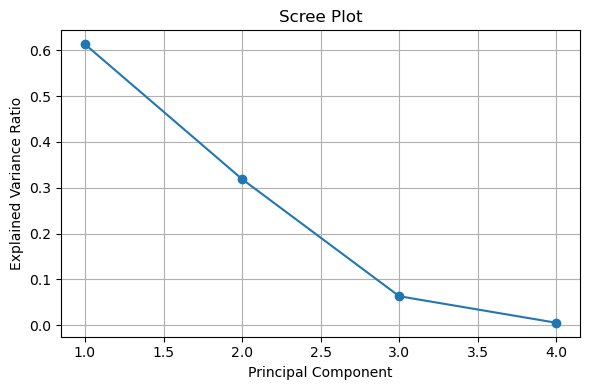

In [39]:
plt.figure(figsize=(6, 4))
plt.plot(components, explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

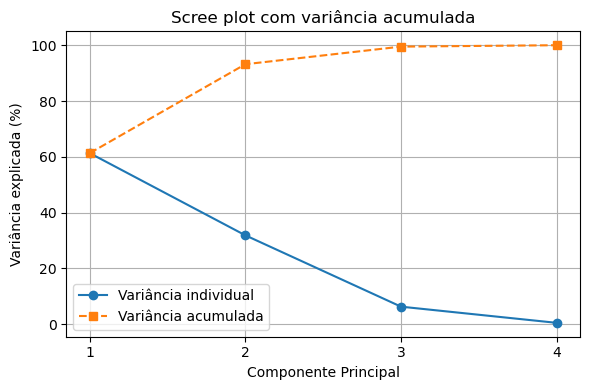

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Agora com seus valores reais
components = np.arange(1, len(explained_variance) + 1)

# Variância explicada (%) e acumulada (%)
explained_var_pct = explained_variance * 100
cumulative_var_pct = np.cumsum(explained_variance) * 100

# Criar figura com fundo branco
fig, ax = plt.subplots(figsize=(6, 4))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Linha da variância explicada por componente
ax.plot(components, explained_var_pct, marker='o', label='Variância individual')

# Linha da variância acumulada
ax.plot(components, cumulative_var_pct, marker='s', linestyle='--', label='Variância acumulada')

# Eixos e título
ax.set_xlabel("Componente Principal")
ax.set_ylabel("Variância explicada (%)")
ax.set_title("Scree plot com variância acumulada")
ax.set_xticks(components)
ax.grid(True)
ax.legend()

# Ajustar layout
plt.tight_layout()

# Salvar em PNG, fundo branco, 600 dpi
plt.savefig("scree_plot_pca.png", dpi=600, bbox_inches="tight", facecolor='white')

# Mostrar na tela
plt.show()


In [40]:
print("Explained variance (bruto):", explained_variance)
print("Explained variance (%):", explained_variance * 100)
print("Acumulado (%):", np.cumsum(explained_variance) * 100)


Explained variance (bruto): [0.61323894 0.31867141 0.06302966 0.00505999]
Explained variance (%): [61.32389403 31.86714113  6.30296557  0.50599928]
Acumulado (%): [ 61.32389403  93.19103515  99.49400072 100.        ]


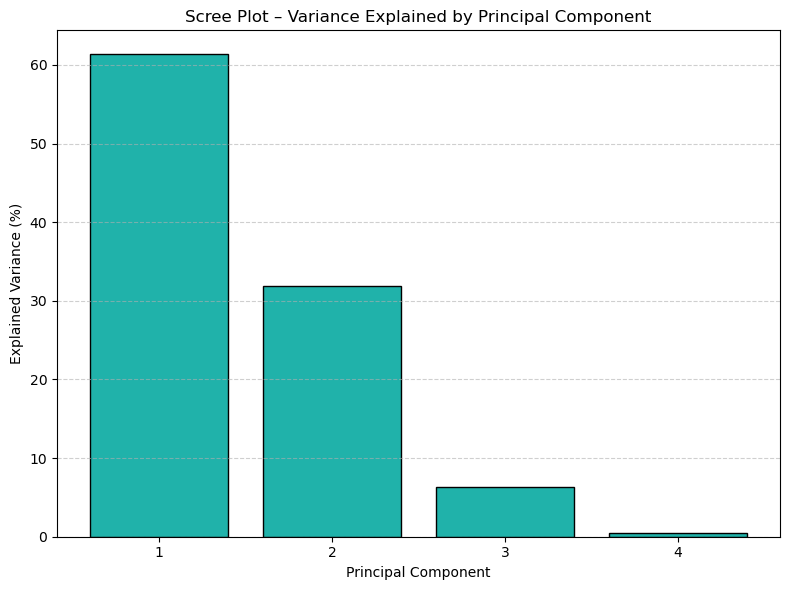

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Garantir que estamos usando os valores da PCA
# (caso ainda não tenha feito logo antes)
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)

plt.figure(figsize=(8, 6))
plt.bar(
    components,
    explained_variance * 100,
    color='LightSeaGreen',
    edgecolor='black'
)

plt.xticks(components)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot – Variance Explained by Principal Component')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig("PCA-variancia-por-PC.png", dpi=600)
plt.show()


Gráfico PCA do tipo Score plot

## Comments:
# O Score plot mostra as amostras (observações) projetadas nos componentes principais. Cada ponto representa uma amostra, e sua posição indica semelhança ou diferença com as outras.
# Eixos: Eixo X → PC1; Eixo Y → PC2
# Na PCA, tanto o score plot quanto o biplot são geralmente representados em 2D (PC1 × PC2), pois esses dois primeiros componentes costumam capturar a maior parte da variância dos dados, permitindo uma visualização clara dos agrupamentos e da influência das variáveis.
# 3D (PC1 vs PC2 vs PC3) → usado quando a 3ª componente também explica muita variância

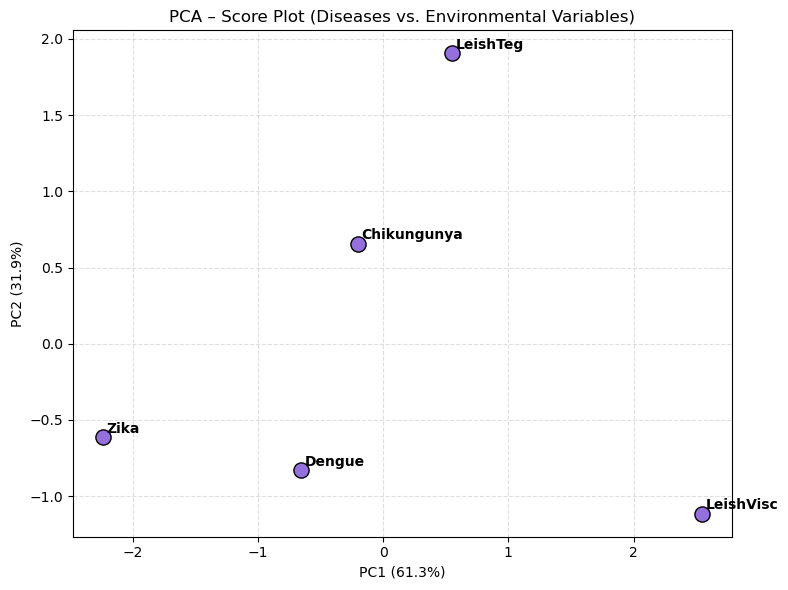

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# scatter plot (todos os pontos da mesma cor, pois você está analisando doenças)
plt.scatter(
    X_pca[:, 0], 
    X_pca[:, 1], 
    color='MediumPurple', 
    s=120, 
    edgecolor='black'
)

# adicionar labels (nomes das doenças)
for i, doenca in enumerate(doencas):
    plt.text(
        X_pca[i, 0] + 0.03, 
        X_pca[i, 1] + 0.03, 
        doenca,
        fontsize=10,
        fontweight='bold'
    )

plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}%)")
plt.title("PCA – Score Plot (Diseases vs. Environmental Variables)")
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


# Versão com cores distintas

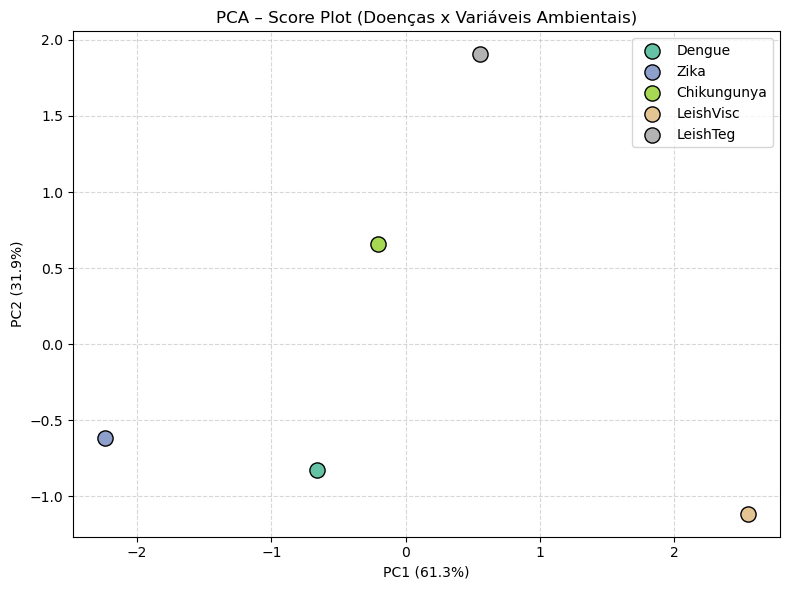

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Gerar paleta de cores (uma cor por doença)
cores = plt.cm.Set2(np.linspace(0, 1, len(doencas)))

plt.figure(figsize=(8, 6))

# Plotar cada doença com uma cor diferente
for i, doenca in enumerate(doencas):
    plt.scatter(
        X_pca[i, 0], 
        X_pca[i, 1], 
        color=cores[i], 
        s=120, 
        edgecolor='black',
        label=doenca
    )

# Eixos com variância explicada
plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}%)")

plt.title("PCA – Score Plot (Diseases vs. Environmental Variables)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Gráfico PCA do tipo Biplot

## Comments:
# O biplot combina duas informações em um único gráfico: as amostras (scores); e as variáveis originais (loadings → setas ou vetores, que mostram direção e importância).
# O comprimento das setas indica quanto cada variável contribui para o componente.
# O ângulo entre setas indica correlação:
# - Setas próximas → variáveis correlacionadas.
# - Setas opostas → variáveis negativamente correlacionadas.
# - Setas perpendiculares → variáveis não correlacionadas.

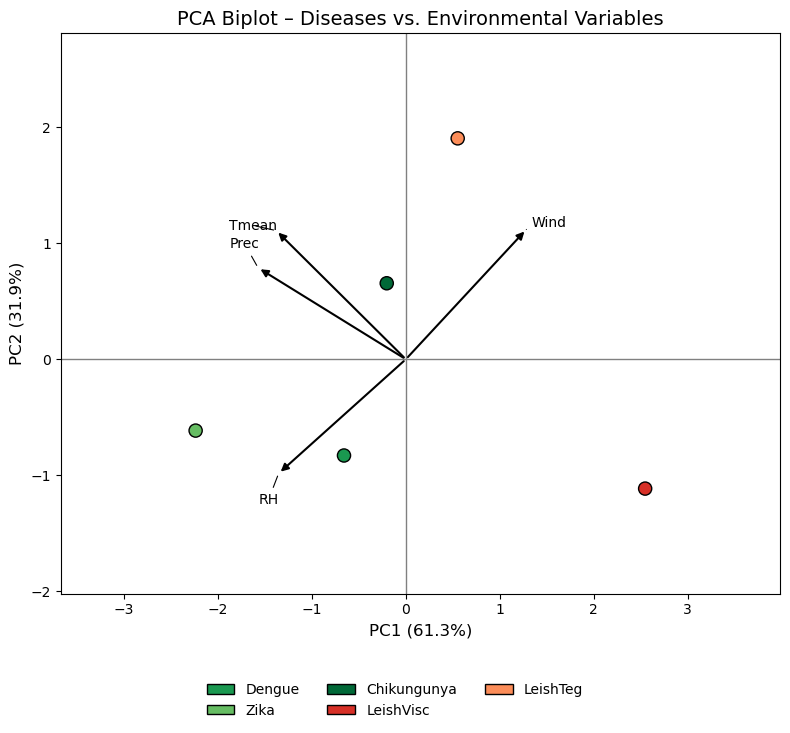

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Patch

# ===== Dados =====
# scores das doenças nas duas primeiras PCs
scores = X_pca[:, :2]

# variância explicada pelas duas primeiras PCs (%)
pc1, pc2 = pca.explained_variance_ratio_[:2] * 100

# loadings das variáveis ambientais (PC1 e PC2)
load = pca.components_.T[:, :2] * np.sqrt(pca.explained_variance_[:2])

# ===== Renomear variáveis para forma curta =====
rename_map = {
    "Temp_mean":    "Tmean",
    "Precipitation":"Prec",
    "RH":           "RH",
    "Wind_mean":    "Wind"
}

# usa a ordem da lista 'variaveis' que você definiu antes
variaveis_curto = [rename_map[v] for v in variaveis]

# ===== Parâmetros =====
arrow_scale  = 1.6
label_out    = 0.22
label_side   = 0.12
fs_var       = 10
fs_axes      = 12
fs_title     = 14
ms_score     = 90

# ===== PALETA (mantida) =====
color_map = {
    "Dengue":       "#1a9850",
    "Zika":         "#66bd63",
    "Chikungunya":  "#006837",
    "LeishVisc":    "#d73027",
    "LeishTeg":     "#fc8d59",
}
colors = [color_map[d] for d in doencas]

# ===== FIGURA =====
fig, ax = plt.subplots(figsize=(8, 7), facecolor="white")

# --- Pontos das doenças ---
ax.scatter(
    scores[:, 0],
    scores[:, 1],
    s=ms_score,
    c=colors,
    edgecolor="black"
)

# --- Setas e rótulos das variáveis ambientais ---
ends = load * arrow_scale
for j, var in enumerate(variaveis_curto):
    x, y = ends[j]

    # seta a partir da origem
    ax.add_patch(
        FancyArrowPatch(
            (0, 0), (x, y),
            arrowstyle='-|>',
            mutation_scale=11,
            linewidth=1.5,
            color='black'
        )
    )

    # vetor unitário e perpendicular para posicionar o texto
    norm = np.hypot(x, y) or 1.0
    ux, uy = x / norm, y / norm
    nx, ny = -uy, ux
    sign = 1 if j % 2 == 0 else -1  # alterna lado do desvio

    tx = x + label_out * ux + sign * label_side * nx
    ty = y + label_out * uy + sign * label_side * ny

    ax.annotate(
        var,
        xy=(x, y),
        xytext=(tx, ty),
        fontsize=fs_var,
        color='black',
        ha='center',
        va='center',
        arrowprops=dict(arrowstyle='-', lw=0.8, color='black')
    )

# --- Eixos e estética ---
ax.axhline(0, color='gray', lw=1)
ax.axvline(0, color='gray', lw=1)

for spine in ax.spines.values():
    spine.set_visible(True)

# Limites automáticos para caber scores + setas + rótulos
allx = np.r_[scores[:, 0], ends[:, 0]]
ally = np.r_[scores[:, 1], ends[:, 1]]
xr = allx.max() - allx.min()
yr = ally.max() - ally.min()
ax.set_xlim(allx.min() - 0.3 * xr, allx.max() + 0.3 * xr)
ax.set_ylim(ally.min() - 0.3 * yr, ally.max() + 0.3 * yr)

ax.set_xlabel(f"PC1 ({pc1:.1f}%)", fontsize=fs_axes)
ax.set_ylabel(f"PC2 ({pc2:.1f}%)", fontsize=fs_axes)
ax.set_title("PCA Biplot – Diseases vs. Environmental Variables", fontsize=fs_title)
ax.grid(False)

# ===== LEGENDA NO FUNDO =====
handles = [Patch(facecolor=color_map[d], edgecolor='black', label=d) for d in doencas]
fig.legend(
    handles,
    doencas,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.05),
    ncol=3,
    fontsize=10,
    frameon=False
)

plt.tight_layout(rect=[0, 0.06, 1, 1])

# ===== SALVAR COM FUNDO BRANCO E 600 DPI =====
fig.savefig(
    "PCA_biplot_doencas.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight"
)

plt.show()


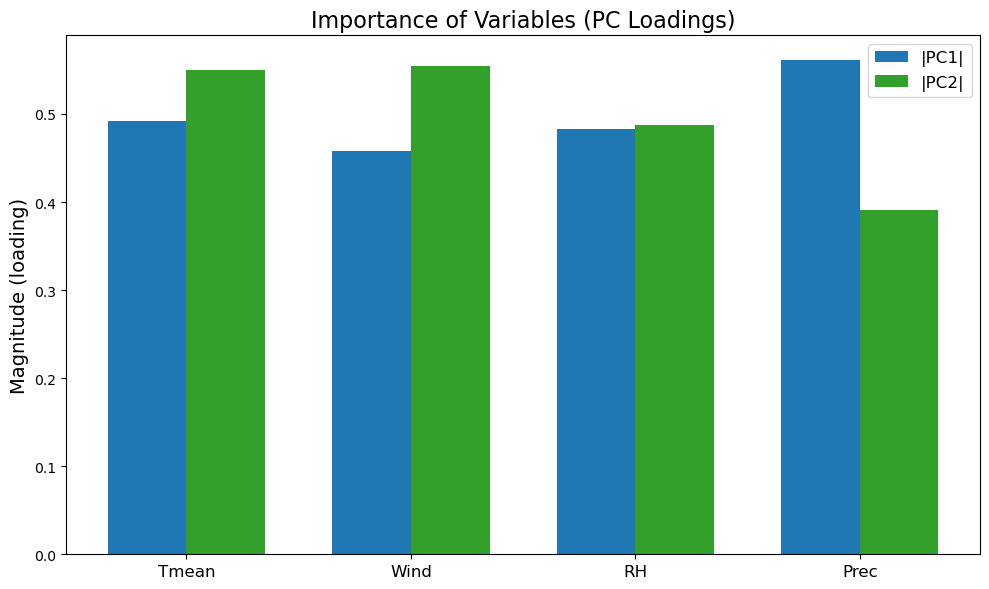

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# ===== 1. Calcular loadings das PCs (em módulo) =====
# pca.components_ tem shape (n_components, n_variáveis)
# Para PC1 → components_[0]
# Para PC2 → components_[1]

load_pc1 = np.abs(pca.components_[0])   # |PC1|
load_pc2 = np.abs(pca.components_[1])   # |PC2|

# variáveis curtas já definidas no biplot: ["Tmean", "Prec", "RH", "Wind"]
vars_short = variaveis_curto

# ===== 2. Ordenar pela soma das magnitudes (ordem decrescente) =====
order = np.argsort(-(load_pc1 + load_pc2))

vars_ord = [vars_short[i] for i in order]
pc1_ord = load_pc1[order]
pc2_ord = load_pc2[order]

# ===== 3. Plot =====
x = np.arange(len(vars_ord))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, pc1_ord, width, label='|PC1|', color="#1f78b4")
plt.bar(x + width/2, pc2_ord, width, label='|PC2|', color="#33a02c")

plt.xticks(x, vars_ord, fontsize=12)
plt.ylabel("Magnitude (loading)", fontsize=14)
plt.title("Importance of Variables (PC Loadings)", fontsize=16)

plt.legend(fontsize=12)
plt.tight_layout()

# Salvar com fundo branco e 600 dpi
plt.savefig("Loadings_modulo_ordenado.png", dpi=600, facecolor='white')

plt.show()


ETAPA 12 - Análises de Clusterização (K-Means e DBSCAN)

Determinação do número ideal de clusters

## Comments:
# A etapa de determinação do número ideal de clusters é uma parte essencial antes de aplicar o K-Means.

# sil_scores =[] --> cria uma lista vazia onde será armazenado os valores do Silhouette Score calculados para cada número de clusters (k).
# k_range = range(2,4) --> define o intervalo de valores de k (número de clusters) a testar: de 2 até 5.
# labels = kmeans.fit_predict(X_pca) --> executa o K-Means sobre os dados (X_pca) e retorna os rótulos (labels) atribuídos a cada amostra.
# sil_score = silhouette_score(X_pca, labels) --> calcula o Silhouette Score para aquele valor de k.
# sil_scores.append(sil_score) --> adiciona o valor do Silhouette Score calculado à lista sil_scores.

Importar pacotes necessários

In [53]:
# === Pacotes para clusterização e preparação ===
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

from matplotlib.colors import ListedColormap
import matplotlib.patheffects as pe

Definir os dados para clusterização (PC1 e PC2)

In [54]:
# Vamos usar apenas PC1 e PC2 (mais interpretáveis)
# X_pca já foi definido antes pela PCA
X_scores = X_pca[:, :2]   # (5, 2) → 5 doenças, 2 PCs

print("Formato usado para clusterização:", X_scores.shape)

Formato usado para clusterização: (5, 2)


Avaliação por Silhouette (K = 2 até número máximo possível)

In [55]:
n_samples = X_scores.shape[0]           
k_range   = range(2, n_samples)   # aqui: k = 2, 3, 4

sil_scores = []
inertias   = []

best_k = None
best_sil = -1.0

for k in k_range:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    labels = km.fit_predict(X_scores)
    inertias.append(km.inertia_)
    
    n_labels = len(set(labels))
    # válido apenas se 2 <= n_labels <= n_samples-1
    if 2 <= n_labels <= n_samples - 1:
        sil = silhouette_score(X_scores, labels)
    else:
        sil = np.nan  # ignora casos inválidos
    sil_scores.append(sil)
    
    if not np.isnan(sil) and sil > best_sil:
        best_sil, best_k = sil, k

print(f"\nMelhor k pelo silhouette: k={best_k} (silhouette={best_sil:.3f})")

print("\nResumo dos valores de silhouette:")
for k, sil in zip(k_range, sil_scores):
    print(f"k={k}: silhouette={sil}")

c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Melhor k pelo silhouette: k=3 (silhouette=0.322)

Resumo dos valores de silhouette:
k=2: silhouette=0.303840783334857
k=3: silhouette=0.3219275781293546
k=4: silhouette=0.11438030456645198


Gráfico Silhouette × k

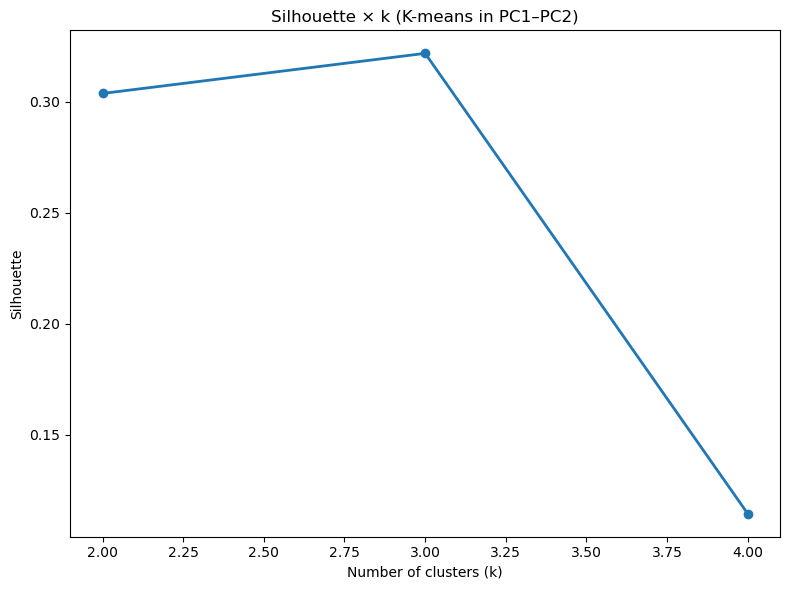

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(list(k_range), sil_scores, marker='o', linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette')
plt.title('Silhouette × k (K-means in PC1–PC2)')
plt.grid(False)
plt.tight_layout()
plt.savefig("silhouette_vs_k.png", dpi=600, facecolor="white", bbox_inches="tight")
plt.show()

Elbow (Inertia × k) (recalcula inertia no mesmo range) - Método do cotovelo

c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


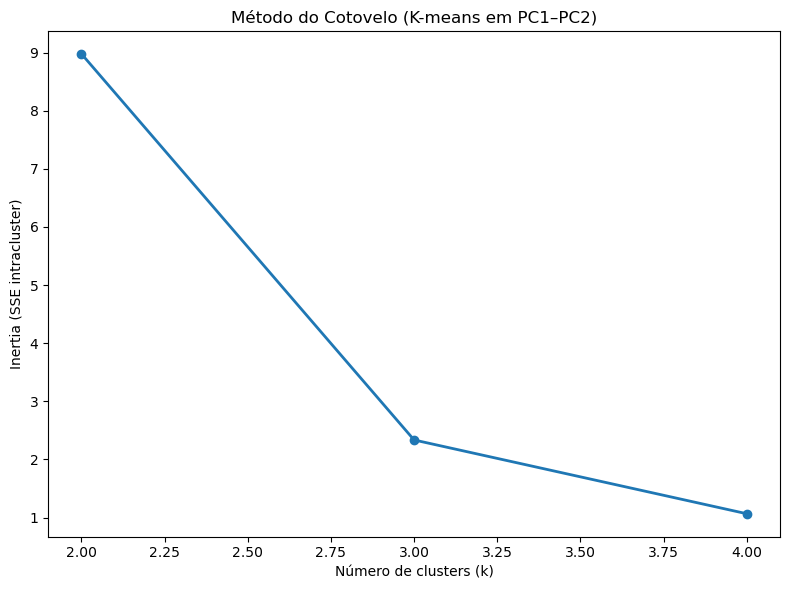

In [58]:
inertias = []
for k in k_range:
    km = KMeans(n_clusters=k, n_init=50, random_state=42)
    km.fit(X_scores)   # PC1–PC2
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(list(k_range), inertias, marker='o', linewidth=2)
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inertia (SSE intracluster)')
plt.title('Método do Cotovelo (K-means em PC1–PC2)')
plt.grid(False)
plt.tight_layout()
plt.savefig("elbow_inertia.png", dpi=600, facecolor="white", bbox_inches="tight")
plt.show()

Plot do K-means e DBSCAN 

## Comments:
# K-means com k=3 segundo os métodos silhouette e cotovelo

c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k-distance (ordenada) para escolha de eps: [1.46035088 1.46035088 1.55373226 1.5931604  3.21699551]
Rótulos DBSCAN (cluster): [-1 -1 -1 -1 -1]


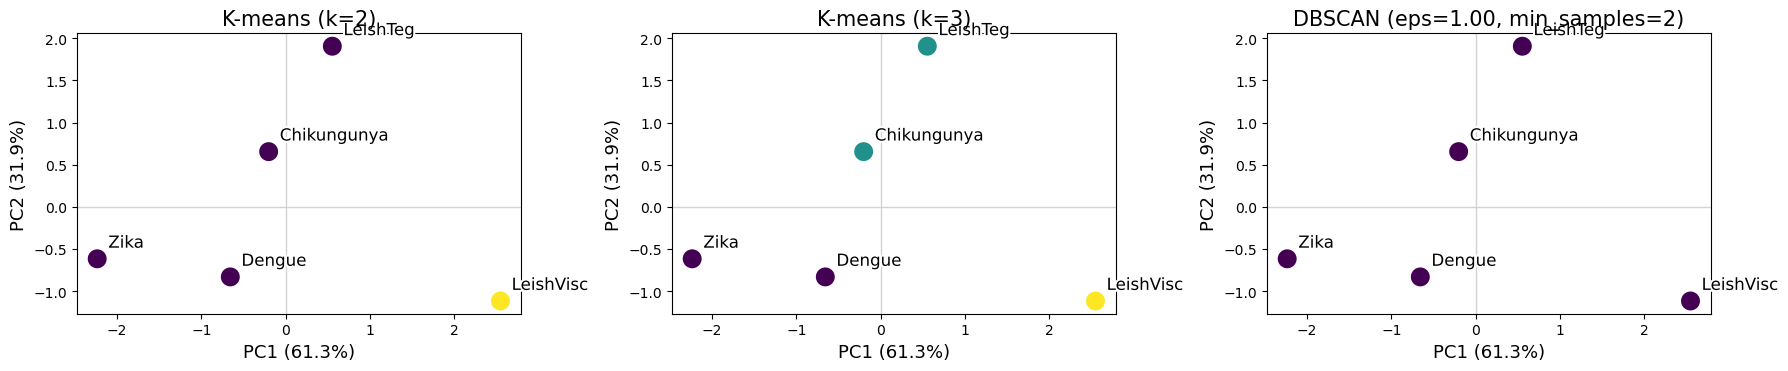

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.patheffects as pe

# ===== Dados =====
X2 = X_pca[:, :2]   # PC1 e PC2
names = doencas

# variância explicada pelas duas PCs (para os eixos)
pc1_var, pc2_var = pca.explained_variance_ratio_[:2] * 100

# ===== Função para plot =====
def plot_panel(ax, X, labels, title):
    sc = ax.scatter(X[:, 0], X[:, 1],
                    c=labels, cmap='viridis',
                    s=220, edgecolor='white', linewidth=1.2)

    # Rótulos (nomes das doenças)
    for i, nm in enumerate(names):
        ax.annotate(nm, (X[i, 0], X[i, 1]),
                    xytext=(8, 8), textcoords="offset points",
                    fontsize=12,
                    path_effects=[pe.withStroke(linewidth=3, foreground="white")])

    ax.axhline(0, color='lightgray', lw=1)
    ax.axvline(0, color='lightgray', lw=1)

    ax.set_title(title, fontsize=15)
    ax.set_xlabel(f"PC1 ({pc1_var:.1f}%)", fontsize=13)
    ax.set_ylabel(f"PC2 ({pc2_var:.1f}%)", fontsize=13)
    ax.set_aspect('equal')

# ===== K-means (k = 2 e k = 3) =====
km2 = KMeans(n_clusters=2, n_init=50, random_state=42)
lab_k2 = km2.fit_predict(X2)

km3 = KMeans(n_clusters=3, n_init=50, random_state=42)
lab_k3 = km3.fit_predict(X2)

# ===== DBSCAN – escolher eps e min_samples =====
min_samples = 2  # número mínimo de pontos em um raio eps
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X2)
distances, _ = nbrs.kneighbors(X2)

# k-distance ordenada (para inspecionar o "joelho")
kdist = np.sort(distances[:, -1])
print("k-distance (ordenada) para escolha de eps:", kdist)

# você pode olhar o array acima e escolher um eps em torno do 'joelho'
# por exemplo, começar testando eps = 1.0
eps_sug = 1.0

db = DBSCAN(eps=eps_sug, min_samples=min_samples)
lab_db = db.fit_predict(X2)
print("Rótulos DBSCAN (cluster):", lab_db)

# ===== Figura: K-means k=2, K-means k=3, DBSCAN =====
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

plot_panel(axes[0], X2, lab_k2, "K-means (k=2)")
plot_panel(axes[1], X2, lab_k3, "K-means (k=3)")
plot_panel(axes[2], X2, lab_db, f"DBSCAN (eps={eps_sug:.2f}, min_samples={min_samples})")

plt.tight_layout()
plt.savefig("clusters_k2_k3_dbscan_eps1.png", dpi=600,
            bbox_inches='tight', facecolor="white")
plt.show()


In [60]:
for eps in [0.6, 0.8, 1.0, 1.2, 1.5]:
    db = DBSCAN(eps=eps, min_samples=2)
    labels = db.fit_predict(X2)
    print(f"eps={eps:.2f} → labels={labels}")


eps=0.60 → labels=[-1 -1 -1 -1 -1]
eps=0.80 → labels=[-1 -1 -1 -1 -1]
eps=1.00 → labels=[-1 -1 -1 -1 -1]
eps=1.20 → labels=[-1 -1 -1 -1 -1]
eps=1.50 → labels=[-1 -1  0 -1  0]


## Comments:
# eps muito pequeno → todo mundo vira ruído (-1 -1 -1 -1 -1)
# eps um pouco maior (~1.5) → apenas Dengue e Chikungunya formam um cluster, resto ruído
# eps grande (como 3.6 no começo) → todo mundo num cluster só

# eps = 1.5
# mean_samples = 2

c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ferna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k-distance (ordenada) para escolha de eps: [1.46035088 1.46035088 1.55373226 1.5931604  3.21699551]
Rótulos DBSCAN (cluster): [-1 -1  0 -1  0]


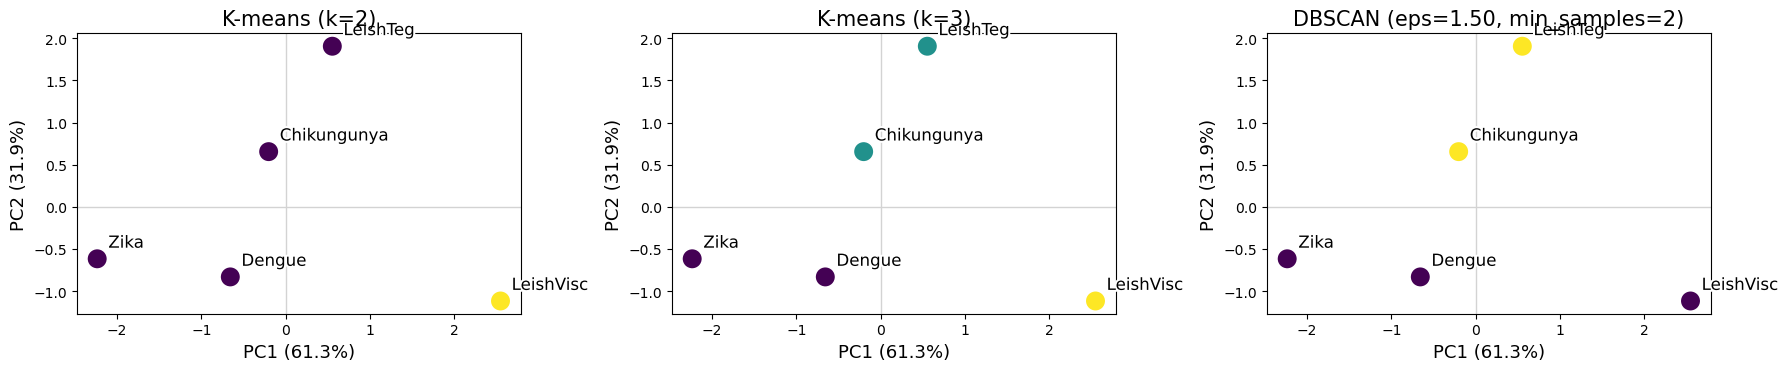

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.patheffects as pe

# ===== Dados =====
X2 = X_pca[:, :2]   # PC1 e PC2
names = doencas

# variância explicada pelas duas PCs (para os eixos)
pc1_var, pc2_var = pca.explained_variance_ratio_[:2] * 100

# ===== Função para plot =====
def plot_panel(ax, X, labels, title):
    sc = ax.scatter(X[:, 0], X[:, 1],
                    c=labels, cmap='viridis',
                    s=220, edgecolor='white', linewidth=1.2)

    # Rótulos (nomes das doenças)
    for i, nm in enumerate(names):
        ax.annotate(nm, (X[i, 0], X[i, 1]),
                    xytext=(8, 8), textcoords="offset points",
                    fontsize=12,
                    path_effects=[pe.withStroke(linewidth=3, foreground="white")])

    ax.axhline(0, color='lightgray', lw=1)
    ax.axvline(0, color='lightgray', lw=1)

    ax.set_title(title, fontsize=15)
    ax.set_xlabel(f"PC1 ({pc1_var:.1f}%)", fontsize=13)
    ax.set_ylabel(f"PC2 ({pc2_var:.1f}%)", fontsize=13)
    ax.set_aspect('equal')

# ===== K-means (k = 2 e k = 3) =====
km2 = KMeans(n_clusters=2, n_init=50, random_state=42)
lab_k2 = km2.fit_predict(X2)

km3 = KMeans(n_clusters=3, n_init=50, random_state=42)
lab_k3 = km3.fit_predict(X2)

# ===== DBSCAN – escolher eps e min_samples =====
min_samples = 2  # número mínimo de pontos em um raio eps
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X2)
distances, _ = nbrs.kneighbors(X2)

# k-distance ordenada (para inspecionar o "joelho")
kdist = np.sort(distances[:, -1])
print("k-distance (ordenada) para escolha de eps:", kdist)

# você pode olhar o array acima e escolher um eps em torno do 'joelho'
# por exemplo, começar testando eps = 1.0
eps_sug = 1.5

db = DBSCAN(eps=eps_sug, min_samples=min_samples)
lab_db = db.fit_predict(X2)
print("Rótulos DBSCAN (cluster):", lab_db)

# ===== Figura: K-means k=2, K-means k=3, DBSCAN =====
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

plot_panel(axes[0], X2, lab_k2, "K-means (k=2)")
plot_panel(axes[1], X2, lab_k3, "K-means (k=3)")
plot_panel(axes[2], X2, lab_db, f"DBSCAN (eps={eps_sug:.2f}, min_samples={min_samples})")

plt.tight_layout()
plt.savefig("clusters_k2_k3_dbscan_eps1-5.png", dpi=600,
            bbox_inches='tight', facecolor="white")
plt.show()
